# Travaux pratiques - SVM linéaires

L’objectif de cette séance de travaux pratiques est d’illustration l’utilisation des machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification linéaires en python avec Scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  
- [Site LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)  
- [Site LibLinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)  


Source : http://cedric.cnam.fr/vertigo/cours/ml2/tpSVMLineaires.html

# Machines à vecteurs de support linéaires

Les machines à vecteurs de support (SVM : *Support Vector Machines*) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :

- Très efficaces en dimension élevée.  
- Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le nombre d’échantillons d’apprentissage.  
- Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.  


Désavantages :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.  
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités.  

## Jeu de données Iris

Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version linéaire (Scikit-learn utilise les bibliothèques libLinear et libSVM déjà discutées). Nous allons utiliser le jeu de données Iris déjà rencontré dans les séances précédentes. Pour pouvoir afficher les résultats, on va utiliser seulement les premiers deux attributs (longueur et largeur des sépales).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()

Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données :

In [2]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire :

In [3]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Calculez le score d’échantillons bien classifiés sur le jeu de données de test.
</div>

In [4]:
lin_svc.score(X_test, y_test)

0.8266666666666667

Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

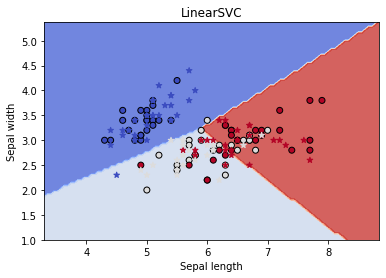

In [5]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" >

Testez differentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

</div>

In [13]:
def test_c(X_train, y_train, X_test, y_test, C = 1.0):
    lin_svc = svm.LinearSVC(C=C)
    lin_svc.fit(X_train, y_train)
    print(C, "Score :", round(lin_svc.score(X_test, y_test), 2))
    # Créer la surface de décision discretisée
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
    h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Surface de décision
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title("LinearSVC")
    plt.show()
    return lin_svc
    

1.0 Score : 0.83


C:\Program Files\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


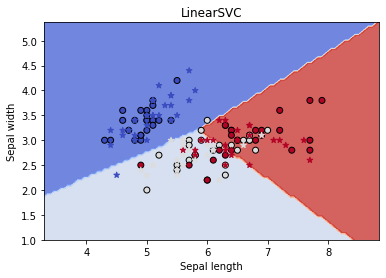

C:\Program Files\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


4.0 Score : 0.87


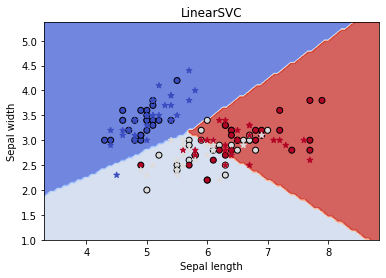

8.0 Score : 0.84


C:\Program Files\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


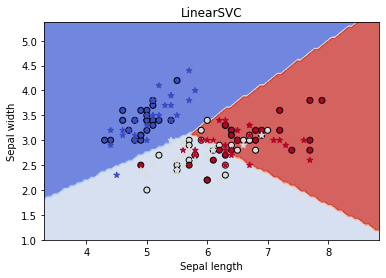

0.5 Score : 0.85


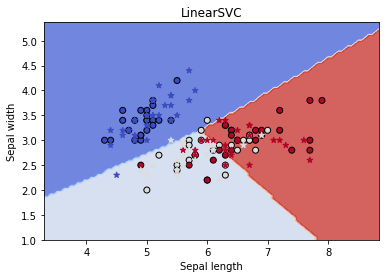

0.2 Score : 0.84


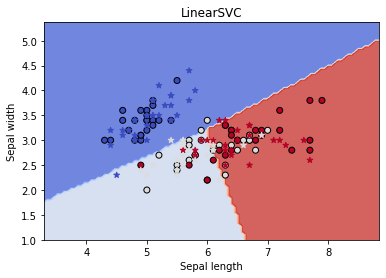

In [15]:
lin_svc = test_c(X_train, y_train, X_test, y_test, C = 1.0)
lin_svc = test_c(X_train, y_train, X_test, y_test, C = 4.0)
lin_svc = test_c(X_train, y_train, X_test, y_test, C = 8.0)
lin_svc = test_c(X_train, y_train, X_test, y_test, C = 0.5)
lin_svc = test_c(X_train, y_train, X_test, y_test, C = 0.2)

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Réponse
</div>
<p style="display: flex; border-left: 0.2em solid #006e12;)" > 
Le classifieur produit des frontières de décision linéaire. Cela suffit à séparer une des trois classes des deux autres, toutefois en ne considérant que les deux premiers attributs, les deux autres classes ne semblent pas linéairement séparables.
</p>

<p style="display: flex; border-left: 0.2em solid #006e12;)" > 
Il faudrait soit utiliser un modèle non linéaire, soit ajouter des attributs supplémentaires en espérant qu’ils permettront de séparer linéairement les deux classes restantes.

</p>

Nous verrons dans le prochain TP que scikit-learn permet de manipuler des machines à vecteurs de support avec des noyaux non-linéaires dans la classe `SVC`.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')`, comme nous l’avons déjà dit, produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise *One-vs-All* et SVC utilise *One-vs-One*).

C:\Program Files\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


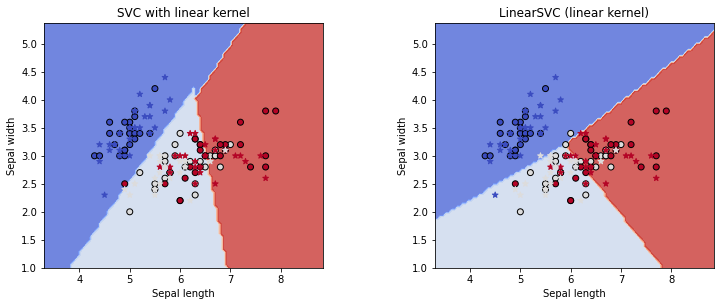

In [17]:
C = 0.5
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>


In [20]:
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

C:\Program Files\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9333333333333333

<div style="display: flex; border-left: 0.2em solid #006e12;)" > 

Le score augmente (de 0.85 à 0.93) car les deux attributs que nous avons ajouté permettent de mieux séparer les trois classes.
</div>

## Jeu de données Digits

Le jeu de données Digits est une collection d’images de chiffres manuscrits (nous l’avons déjà utilisé dans le [TP sur les forêts aléatoires](tpForetsAleatoires.html)). Elles peuvent se charger directement depuis scikit-learn :

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Utilisez les données Digits pour construire un classifieur LinearSVC et évaluez-le. Si le temps d’apprentissage est trop long, sélectionnez une partie plus petite de la base d’apprentissage (par exemple 10000 échantillons). Pour quelle valeur de C on obtient le meilleurs résultats de généralisation ?
</div>

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

In [35]:
@ignore_warnings(category=UserWarning)
def get_models_regression_LinearSVC_grid(X_train, y_train, verbose=False, random_state=0, grid_params=None):
    if verbose: print("LinearSVC", end="")
    if grid_params is None:
        grid_params = { 'linearsvc__C' : np.arange(0.1, 10, 0.1)
                            }
    grid_pipeline = make_pipeline( svm.LinearSVC(random_state=random_state))
    grid = GridSearchCV(grid_pipeline,param_grid=grid_params, cv=4)
    grid.fit(X_train, y_train)
    if verbose: print("             DONE")
    return grid

In [26]:
svm.LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [36]:
grid_linearsvc = get_models_regression_LinearSVC_grid(X_train, y_train)
score = grid_linearsvc.score(X_test, y_test)
print("LinearSVC : ", score)
print(grid_linearsvc.best_params_)

LinearSVC :  0.9333333333333333
{'linearsvc__C': 0.5}


## Approfondissement : LibLinear et libSVM

<div style="display: flex; border-left: 0.2em solid yellow; color:yellow; font-weight:bold;" > 

#### Note
</div>
<div style="display: flex; border-left: 0.2em solid yellow;)" > 

Cette partie est facultative. Elle vous permet de manipuler directement les bibiothèques LibLinear et LibSVM sur lesquelles s’appuie scikit-learn pour les machines à vecteur de supports. Ces implémentations sont très rapides et sont écrites en langage C.
</div>
<div style="display: flex; border-left: 0.2em solid yellow;)" > 
Il est nécessaire d’avoir un compilateur C fonctionnel pour cette partie.
</div>


Dans cette partie nous allons tester [LibLinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/), une implémentation libre de la formulation SVC sur un problème de classification. Ouvrez un terminal lignes de commandes et créez un répertoire `tpsvm` :

In [ ]:
cd ~
mkdir tpsvm
cd tpsvm

Commençons par récupérer et compiler le code de la bibliothèque :

In [ ]:
wget http://cedric.cnam.fr/~ferecatu/RCP209/liblinear-2.2.tar.gz
tar xzvf liblinear-2.2.tar.gz
cd liblinear-2.2/
make

Nous allons utiliser la base de chiffres en en écriture manuscrite MNIST : 10 classes, 60000 échantillons d’apprentissage, 10000 échantillon de test, 784 attributs.

In [ ]:
mkdir databases
cd databases
wget http://cedric.cnam.fr/~ferecatu/RCP209/mnist.bz2
wget http://cedric.cnam.fr/~ferecatu/RCP209/mnist.t.bz2
bzip2 -d mnist.bz2
bzip2 -d mnist.t.bz2

Entrainer un modèle SVMC linéaire avec les paramètres par défaut :

In [ ]:
time ../train mnist
>>> real    2m22.716s
time ../predict mnist.t mnist.model mnist.t.output
>>> Accuracy = 80.26% (8026/10000)
>>> real    0m0.283s

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Les SVM sont par leur conception des classifieurs binaires. Comment LibLinear gère la classification multi-classe (10 classes sur la base MNIST) ?
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>
<div style="display: flex; border-left: 0.2em solid #006e12;)" > 
Voir fichier README : LibLibear implemente la strategie « un contre tous » (one-vs-rest ou one-vs-all) <https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest>`_.
</div>

### LibSVM

On peut obtenir le même type de classification (linéaire) en utilisant [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) et un noyau linéaire.

In [ ]:
cd ~
cd tpsvm
wget http://cedric.cnam.fr/~ferecatu/RCP209/libsvm-3.22.tar.gz
tar xzvf libsvm-3.22.tar.gz
cd libsvm-3.22/
make
ln -s ~/tpsvm/liblinear-2.1/databases .
# Prendre 30000 échantillons aléatoires
shuf -n 20000 databases/mnist > mnist30000
time ./svm-train -t 0 mnist30000
>>> real    3m10.783s
time ./svm-predict  databases/mnist.t mnist30000.model mnist.t.output
>>> Accuracy = 90.86% (9086/10000) (classification)
>>> real    0m33.433s

Avec seulement 30000 échantillons sur la base d’apprentissage, la construction du modèle prend plus de temps que pour LibLinear avec tous les échantillons. Par contre, les performances sont un peu meilleures sur ce jeu de données. L’intérêt de LibLinear est donc la vitesse, ce qui permet de l’appliquer sur de gros jeux de données, mais bien sûr sa limitation est qu’on peut l’appliquer seulement à des problèmes linéaires. La différence entre les deux vient du fait que LibLinear minimise une fonction de perte quadratique alors que LibSVM minimise la perte non-quadratique, ce qui sur cette base semble mieux fonctionner, mais ce n’est pas la règle.

<div style="display: flex; border-left: 0.2em solid #c1002a; color:rgb(145, 0, 31); font-weight:bold;" > 

#### Question
</div>
<div style="display: flex; border-left: 0.2em solid #c1002a;)" > 

Expliquez le paramètre `-t 0` (regardez la documentation).
</div>

<div style="display: flex; border-left: 0.2em solid #006e12; color:#006e12; font-weight:bold;" > 

#### Correction
</div>
<div style="display: flex; border-left: 0.2em solid #006e12;)" > 

Le paramètre `-t 0` signifie noyau lineaire `k(x,y)=xTy`.
</div>

### SVM-toy

Par la suite on va explorer l’outil `svm-toy` qui permet de visualiser la classification pour des problèmes en deux dimensions.

In [ ]:
cd ~/tpsvm/libsvm-3.22/svm-toy/qt
make
./svm-toy

Si la version Qt ne compile pas, essayez la version `svm-toy/gtk` ou la version java `libsvm-3.22/java`. Cliquez sur la surface d’affichage pour ajouter des points d’apprentissage. Changez de couleur pour ajouter une nouvelle classe (l’outil gère aussi la classification multi-classe). Utilisez l’option `-t 0` pour sélectionner la classification linéaire. Pour changer le paramètre à C=valeur utilisez l’option `-c valeur` (par exemple : `-c 2.5`). Testez plusieurs valeurs pour le paramètre C pour voir son comportement de régularisation pour les fichiers suivants : [01.dat](docs/01.dat), [02.dat](docs/02.dat), [03.dat](docs/03.dat).